In [31]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("D:\dsml8\\supplychain\\test_df2.csv")

In [33]:
df.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,5,0,3,0,15,0,0,30,24,0,...,0,1,0,0,0,0,0,1,0,0
1,5,0,2,0,40,1,0,31,5,1,...,0,1,0,0,0,0,0,1,0,0
2,3,0,3,0,40,1,0,41,19,1,...,1,1,0,0,0,0,0,0,1,1
3,5,2,2,0,15,1,0,33,9,1,...,0,0,0,1,0,0,1,0,0,1
4,6,0,4,0,24,0,0,20,25,0,...,0,1,0,0,0,0,1,0,0,1


In [34]:
#splitting into feature and target columns 

In [35]:
x = df.drop(["product_wg_ton"], axis = "columns")

In [36]:
y_actual = df.product_wg_ton

In [37]:
#loading pkl

In [38]:
with open("supply_chain.pkl", "rb") as file:
    clf = pickle.load(file)
    

In [39]:
clf.score(x, y_actual)

0.9804740547973925

In [40]:
y_predicted = clf.predict(x)

In [41]:
df_ = pd.DataFrame({'y_actual': y_actual, 'y_predicted': y_predicted})

In [42]:
df_

,y_actual,y_predicted
0,30132,29079.568014
1,6075,6123.326058
2,24076,24066.621855
3,13092,11406.790599
4,29071,29642.232795
...,...,...
5524,29138,27581.440626
5525,33108,31412.585419
5526,24072,23824.087371
5527,15055,16510.561264


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [44]:
mae = mean_absolute_error(y_actual, y_predicted)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1267.2871654417852


In [45]:
mse = mean_squared_error(y_actual, y_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2647692.6966472804


In [46]:
residuals = df_['y_actual'] - df_['y_predicted']

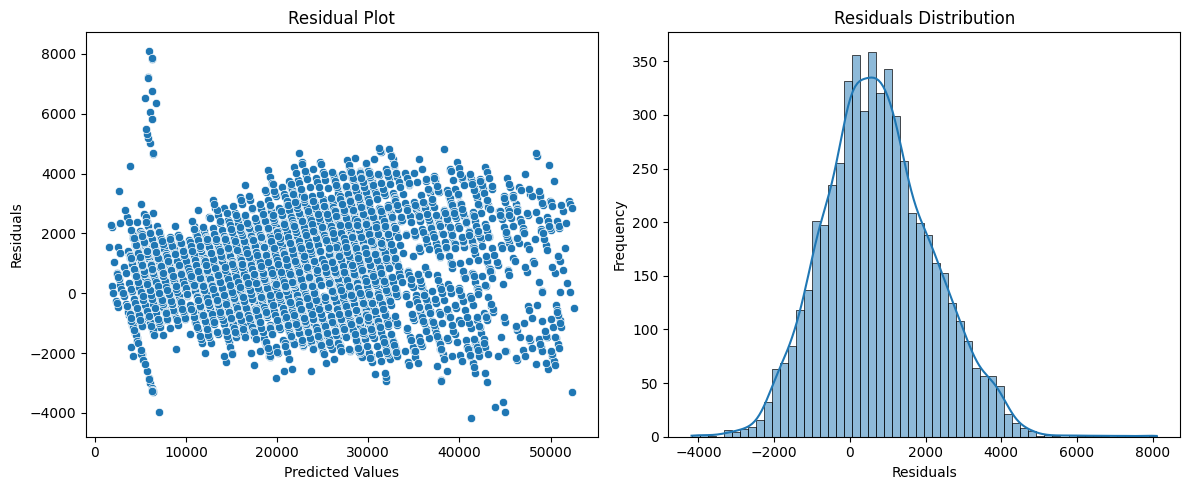

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

residuals = df_['y_actual'] - df_['y_predicted']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of predicted values vs. residuals
sns.scatterplot(x=df_['y_predicted'], y=residuals, ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot')

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residuals Distribution')

plt.tight_layout()
plt.show()


Residual plot: This plot shows the relationship between the predicted values from the model and the residuals (the difference between the actual values and the predicted values). 
Ideally, the residuals should be randomly scattered around a horizontal line at zero. 
This would indicate that there is no pattern in the errors and that the model is fitting the data well.

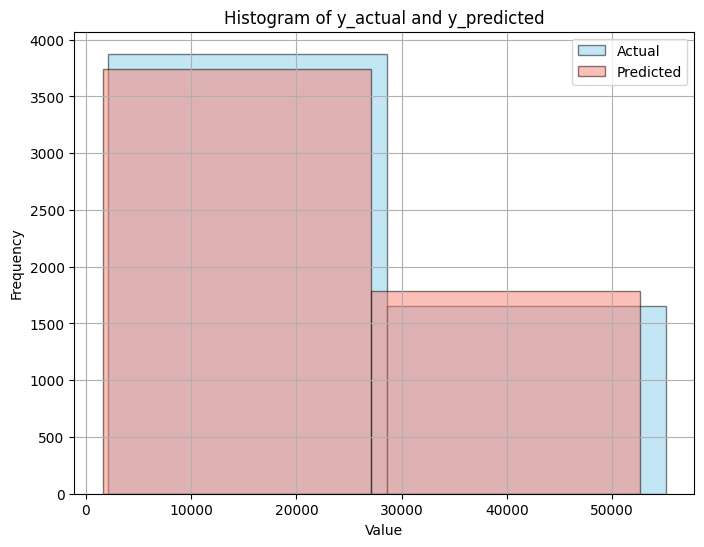

In [48]:

import matplotlib.pyplot as plt
import numpy as np

# Convert lists to numpy arrays for easier manipulation
y_actual = np.array(y_actual)
y_predicted = np.array(y_predicted)

# Plot histogram of y_actual and y_predicted
plt.figure(figsize=(8, 6))
plt.hist(y_actual, bins=2, color='skyblue', edgecolor='black', alpha=0.5, label='Actual')
plt.hist(y_predicted, bins=2, color='salmon', edgecolor='black', alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_actual and y_predicted')
plt.legend()
plt.grid(True)
plt.show()


## insights

1. Evaluation Metrics: Calculated evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2) to assess the performance of models on the testing data.
2. 
Feature Importanc A analydzthatch featur: num_refill_req_l3m, transport_issue_l1y, storage_issue_reported_l3m, temp_reg_mach, wh_breakdown_l3m contributeng the most to the predictions.

Visualizations: Visualize the actual vs. predicted valuand es, resid.ors.